In [17]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn


In [74]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/keerthana/Downloads/dataset.csv")

Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it

In [76]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Step 1: Check for missing values before imputation
missing_values_before = data.isnull().sum()

# Step 2: Impute missing values for numerical columns
num_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create a SimpleImputer instance for numerical columns using median strategy
num_imputer = SimpleImputer(strategy='median')

# Apply the imputer to each of the numerical columns
data[num_columns] = num_imputer.fit_transform(data[num_columns])

# Step 3: Impute missing values for categorical column 'sex' with mode (most frequent value)
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to 'sex' column
data['sex'] = cat_imputer.fit_transform(data[['sex']]).ravel()

# Step 4: Check for missing values after imputation
missing_values_after = data.isnull().sum()

# Combine the before and after results into a single DataFrame for comparison
missing_values_comparison = pd.DataFrame({
    'Missing Count Before': missing_values_before,
    'Missing Count After': missing_values_after
})

# Display the results in a neat format
print("\nMissing Values (Before and After Imputation):")
print(missing_values_comparison)



Missing Values (Before and After Imputation):
                   Missing Count Before  Missing Count After
species                               0                    0
island                                0                    0
bill_length_mm                        7                    0
bill_depth_mm                         2                    0
flipper_length_mm                     2                    0
body_mass_g                           2                    0
sex                                  16                    0


Q2: What is the average body_mass_g for Gentoo penguins?

In [78]:
# Filter data for Gentoo penguins
gentoo_penguins = data[data['species'] == 'Gentoo']

# Calculate the average body_mass_g for Gentoo penguins
average_body_mass_g = gentoo_penguins['body_mass_g'].mean()
print(f"Average body_mass_g for Gentoo penguins: {average_body_mass_g:.2f} grams")


Average body_mass_g for Gentoo penguins: 5125.00 grams


Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species.



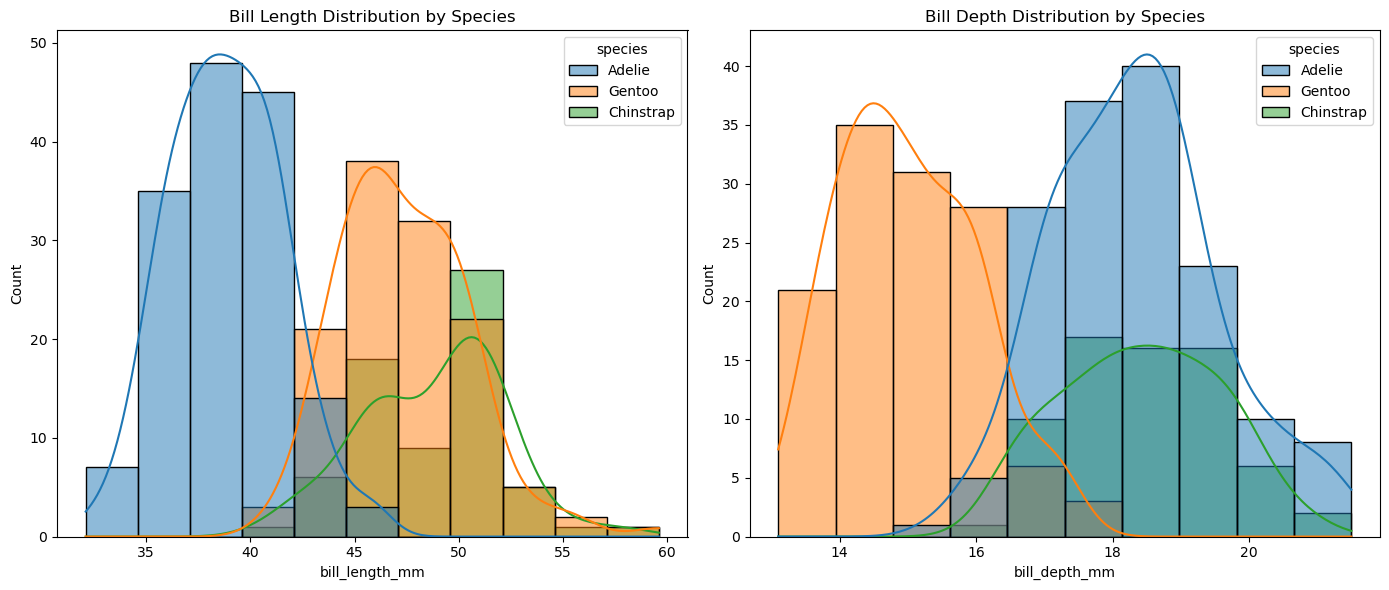


Skewness and Kurtosis for bill_length_mm:
Adelie:
  Skewness: 0.17
  Kurtosis: -0.22
Gentoo:
  Skewness: 0.72
  Kurtosis: 1.18
Chinstrap:
  Skewness: -0.09
  Kurtosis: -0.12

Skewness and Kurtosis for bill_depth_mm:
Adelie:
  Skewness: 0.33
  Kurtosis: -0.10
Gentoo:
  Skewness: 0.35
  Kurtosis: -0.58
Chinstrap:
  Skewness: 0.01
  Kurtosis: -0.90


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Create a figure with two subplots of equal size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of bill_length_mm by species
sns.histplot(data=data, x='bill_length_mm', hue='species', kde=True, ax=axes[0])
axes[0].set_title('Bill Length Distribution by Species')

# Plot the distribution of bill_depth_mm by species
sns.histplot(data=data, x='bill_depth_mm', hue='species', kde=True, ax=axes[1])
axes[1].set_title('Bill Depth Distribution by Species')

# Adjust the layout to ensure equal spacing
plt.tight_layout()
plt.show()

# Calculate skewness and kurtosis for each feature by species
for feature in ['bill_length_mm', 'bill_depth_mm']:
    print(f"\nSkewness and Kurtosis for {feature}:")
    for species in data['species'].unique():
        species_data = data[data['species'] == species]
        feature_data = species_data[feature]
        print(f"{species}:")
        print(f"  Skewness: {skew(feature_data):.2f}")
        print(f"  Kurtosis: {kurtosis(feature_data):.2f}")


Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. 


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect and visualize outliers using IQR
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Function to remove outliers from a feature based on IQR
def remove_outliers(df, feature):
    outliers, lower_bound, upper_bound = detect_outliers(df, feature)
    df_cleaned = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df_cleaned

# Check for outliers in numeric features
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Determine the number of rows and columns for the subplots grid
num_features = len(numeric_cols)
rows = 2  # You can adjust the number of rows as needed
cols = (num_features + rows - 1) // rows  # To ensure the grid accommodates all plots

# Loop through the features to detect outliers, remove them, and plot
for i, col in enumerate(numeric_cols):
    # Detect outliers
    outliers, lower_bound, upper_bound = detect_outliers(data, col)
    print(f"\nOutliers in {col}: {len(outliers)}")
    
    # Handle outliers by removing them from the dataset
    data_cleaned = remove_outliers(data, col)
    print(f"After removing outliers, remaining data for {col}: {len(data_cleaned)} records")



Outliers in bill_length_mm: 0
After removing outliers, remaining data for bill_length_mm: 344 records

Outliers in bill_depth_mm: 0
After removing outliers, remaining data for bill_depth_mm: 344 records

Outliers in flipper_length_mm: 0
After removing outliers, remaining data for flipper_length_mm: 344 records

Outliers in body_mass_g: 3
After removing outliers, remaining data for body_mass_g: 341 records


Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA.

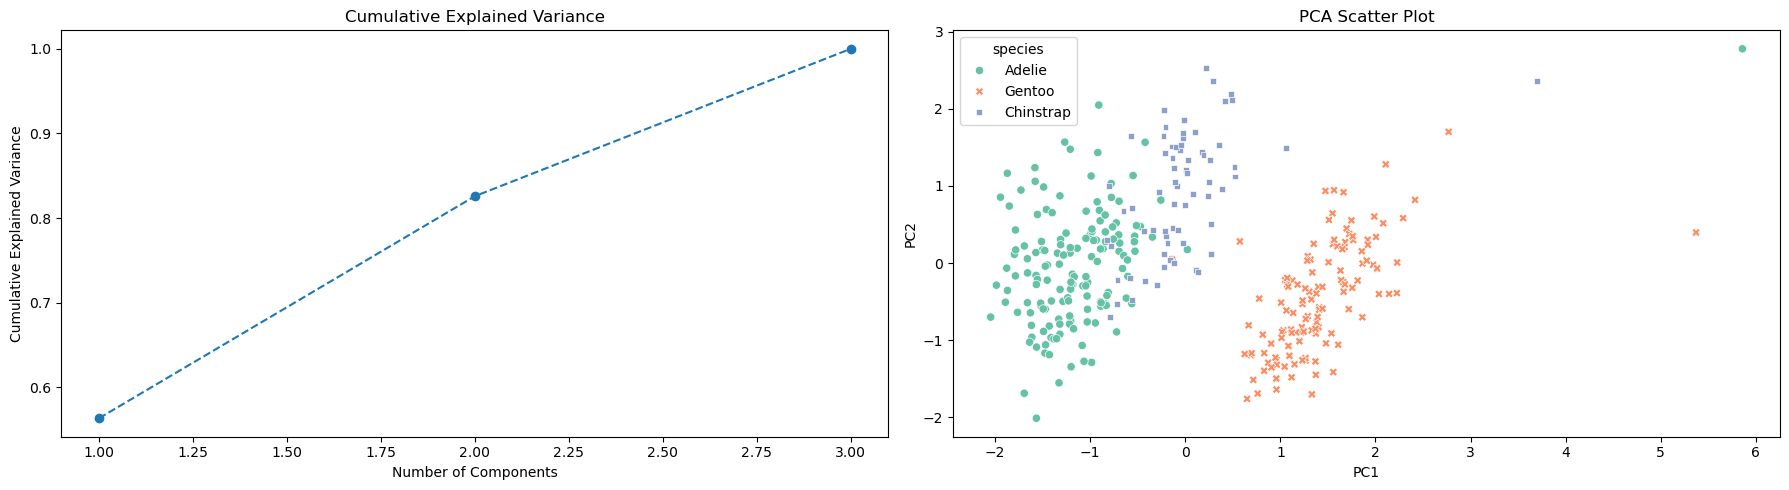

In [84]:
# Import necessary libraries
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])  # Scale only the features

# PCA with Optimal Number of Components
pca = PCA()
pca.fit(scaled_data)

# Create a 1x2 grid of plots (removed Biplot)
fig, axes = plt.subplots(1, 2, figsize=(18, 5))  # 2 plots in a single row

# Plot 1: Cumulative Explained Variance
axes[0].plot(range(1, len(pca.explained_variance_ratio_) + 1),
             pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
axes[0].set_title('Cumulative Explained Variance')
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Cumulative Explained Variance')

# Plot 2: PCA Scatter Plot
pca_2d = PCA(n_components=2)
principal_components = pca_2d.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['species'] = data['species']

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='Set2', style='species', ax=axes[1])
axes[1].set_title('PCA Scatter Plot')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


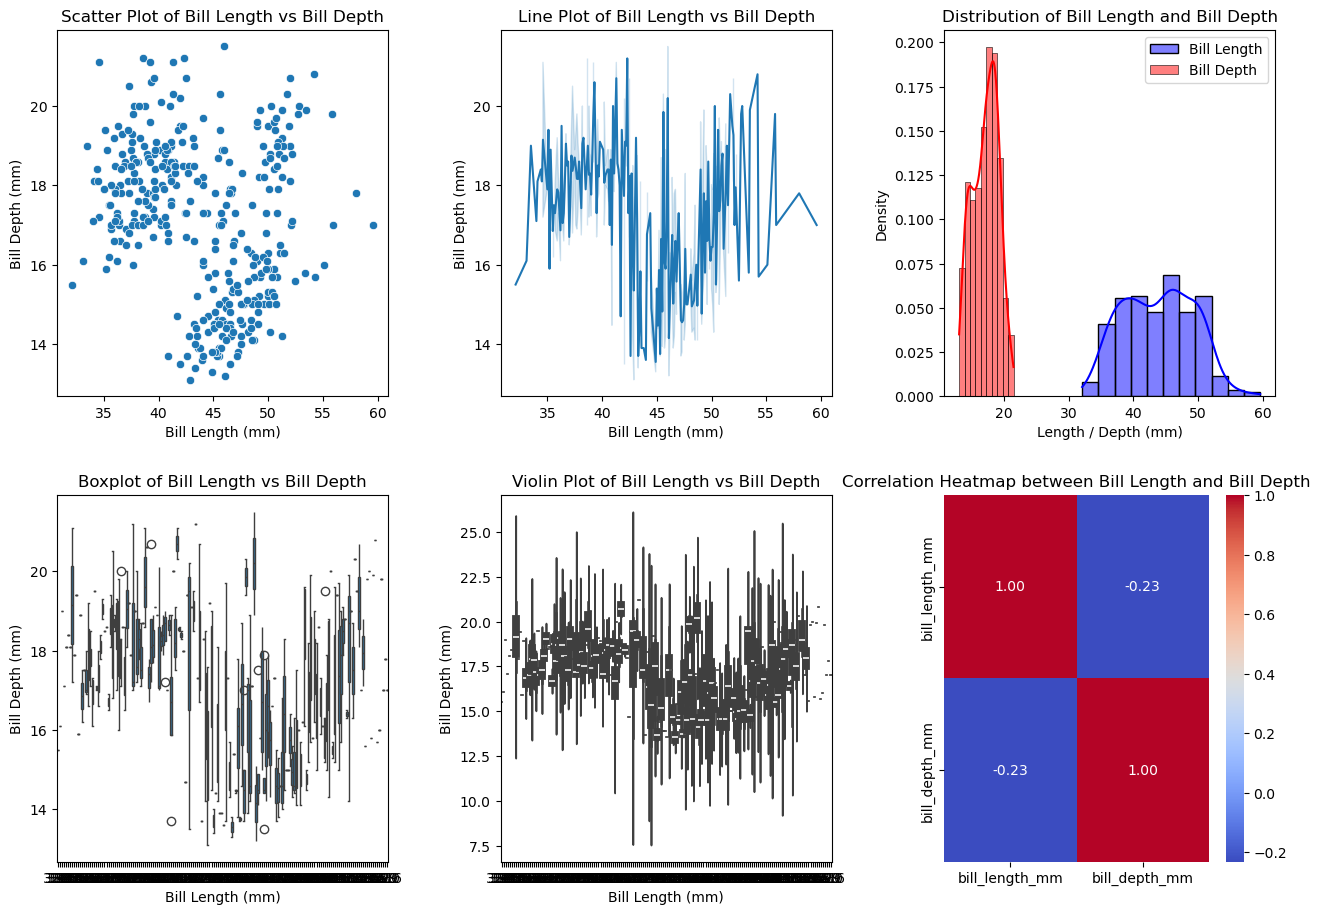

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with a 2x3 grid (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(14, 10))  # Reduced size
fig.tight_layout(pad=5.0)  # Adjust space between subplots

# 1. Scatter Plot
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot of Bill Length vs Bill Depth')
axes[0, 0].set_xlabel('Bill Length (mm)')
axes[0, 0].set_ylabel('Bill Depth (mm)')

# 2. Line Plot
sns.lineplot(x='bill_length_mm', y='bill_depth_mm', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Line Plot of Bill Length vs Bill Depth')
axes[0, 1].set_xlabel('Bill Length (mm)')
axes[0, 1].set_ylabel('Bill Depth (mm)')

# 3. Distribution Plot (Histogram) in axes[0, 2]
sns.histplot(data['bill_length_mm'], kde=True, label='Bill Length', color='blue', stat='density', ax=axes[0, 2])
sns.histplot(data['bill_depth_mm'], kde=True, label='Bill Depth', color='red', stat='density', ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Bill Length and Bill Depth')
axes[0, 2].set_xlabel('Length / Depth (mm)')
axes[0, 2].set_ylabel('Density')
axes[0, 2].legend()

# 4. Boxplot
sns.boxplot(x='bill_length_mm', y='bill_depth_mm', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Bill Length vs Bill Depth')
axes[1, 0].set_xlabel('Bill Length (mm)')
axes[1, 0].set_ylabel('Bill Depth (mm)')

# 5. Violin Plot
sns.violinplot(x='bill_length_mm', y='bill_depth_mm', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot of Bill Length vs Bill Depth')
axes[1, 1].set_xlabel('Bill Length (mm)')
axes[1, 1].set_ylabel('Bill Depth (mm)')

# 6. Heatmap (Correlation)
correlation_matrix = data[['bill_length_mm', 'bill_depth_mm']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 2])
axes[1, 2].set_title('Correlation Heatmap between Bill Length and Bill Depth')

# Show the plots in the 2x3 grid
plt.show()


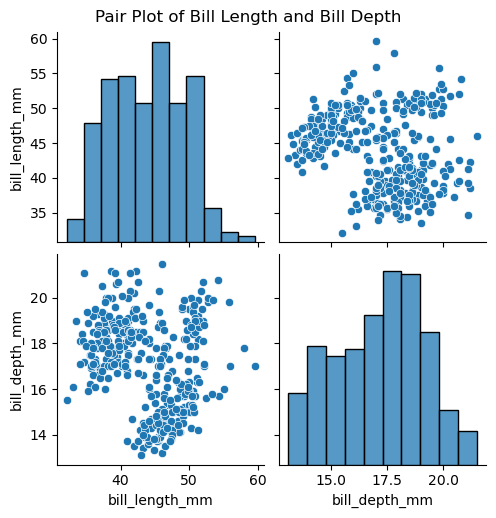

In [64]:

sns.pairplot(data[['bill_length_mm', 'bill_depth_mm']])
plt.suptitle('Pair Plot of Bill Length and Bill Depth', y=1.02)  # Adding title to pair plot
plt.show()


Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? 

In [66]:
# Group by species and island, and calculate the maximum flipper_length_mm for each combination
max_flipper_length = data.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

# Display the maximum flipper_length_mm for each combination of species and island
print("Maximum flipper_length_mm for each combination of species and island:")
print(max_flipper_length)

# Identify which species has the longest flippers on each island
# We group by island and then find the index of the maximum flipper_length_mm within each group (island)
longest_flippers = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]

# Reorder the columns so island comes first, followed by species and flipper_length_mm
longest_flippers = longest_flippers[['island', 'species', 'flipper_length_mm']]

# Display the species with the longest flippers on each island
print("\nSpecies with the longest flippers on each island:")
print(longest_flippers)


Maximum flipper_length_mm for each combination of species and island:
     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0

Species with the longest flippers on each island:
      island    species  flipper_length_mm
4     Biscoe     Gentoo              231.0
3      Dream  Chinstrap              212.0
2  Torgersen     Adelie              210.0


In [ ]:
Q8: Perform z-score normalization on this dataset.

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and you want to normalize all numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Perform Z-score normalization
z_score_normalized_data = data.copy()  # Copy the original data to avoid modifying it
z_score_normalized_data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Display the normalized data
print(z_score_normalized_data.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.883054       0.787289          -1.420541   
1  Adelie  Torgersen       -0.809180       0.126114          -1.063485   
2  Adelie  Torgersen       -0.661432       0.431272          -0.420786   
3  Adelie  Torgersen        0.040373       0.075255          -0.277964   
4  Adelie  Torgersen       -1.326299       1.092447          -0.563608   

   body_mass_g     sex  
0    -0.468990    male  
1    -0.424125  female  
2    -0.917634  female  
3    -0.199803    male  
4    -0.738176  female  


In [75]:
pip install folium



   ---------------------------------------- 0.0/108.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.9 kB ? eta -:--:--
   ----------- --------------------------- 30.7/108.9 kB 325.1 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/108.9 kB 325.1 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/108.9 kB 325.1 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/108.9 kB 325.1 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/108.9 kB 325.1 kB/s eta 0:00:01
   ----------------------------- --------- 81.9/108.9 kB 218.5 kB/s eta 0:00:01
   --------------------------------- ----- 92.2/108.9 kB 249.8 kB/s eta 0:00:01
   -------------------------------------- 108.9/108.9 kB 233.8 kB/s eta 0:00:00


Optional

In [82]:
pip install branca


In [96]:
import folium
import pandas as pd

# Sample penguin data
data = pd.DataFrame({
    'species': ['Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap'],
    'island': ['Torgersen', 'Biscoe', 'Dream', 'Torgersen', 'Biscoe', 'Dream'],
    'count': [50, 30, 20, 60, 40, 25]  # Example counts for each species
})

# Assign fixed "coordinates" for each island
island_locations = {
    'Torgersen': [-64.8, -64.5],
    'Biscoe': [-65.0, -64.0],
    'Dream': [-64.7, -64.6]
}

# Assign URLs to different penguin images
penguin_images = {
    'Adelie': 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Pygoscelis_adeliae.jpg/120px-Pygoscelis_adeliae.jpg',
    'Gentoo': 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Pygoscelis_papua.jpg/120px-Pygoscelis_papua.jpg',
    'Chinstrap': 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Pygoscelis_antarcticus.jpg/120px-Pygoscelis_antarcticus.jpg'
}

# Create a map
m_with_islands = folium.Map(location=[-64.8, -64.5], zoom_start=7)

# Add markers for each island with species and penguin images
for _, row in data.iterrows():
    island = row['island']
    species = row['species']
    count = row['count']
    coords = island_locations[island]  # Get fixed "coordinates" for the island

    # Create the HTML for the popup content (including the image)
    popup_content = f"""
    <strong>Island:</strong> {island}<br>
    <strong>Species:</strong> {species}<br>
    <strong>Count:</strong> {count}<br>
    <img src='{penguin_images[species]}' width='100px'>
    """
    
    # Add a marker with the popup containing the species info and the image
    folium.Marker(
        location=coords,
        popup=folium.Popup(popup_content, max_width=300),
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m_with_islands)

# Set map size by adjusting the root div's width and height
m_with_islands.get_root().width = '600px'  # Set width to reduce the size
m_with_islands.get_root().height = '400px'  # Set height to reduce the size

# Display the map
m_with_islands
